In [0]:
import graphviz
import glob
import hiddenlayer as hl
import torch
import torchvision
from model import D, G
import matplotlib.pyplot as plt
from random import shuffle

In [0]:
D

Discriminator(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv4): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv5): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv6): Sequential(
    (0): Conv2d(128, 128, kernel_si

In [0]:
G

Generator(
  (fc): Linear(in_features=100, out_features=2048, bias=True)
  (deconv1): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (deconv2): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (deconv3): Sequential(
    (0): ConvTranspose2d(32, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (deconv4_res): Sequential(
    (0): ConvTranspose2d(3, 3, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (deconv5_res): Sequential(
    (0): ConvTranspose2d(3, 3, kernel_size=(1, 1), stride=

In [0]:
def build(architecture, initial_shape):
    hl_graph = hl.build_graph(architecture, initial_shape)
    hl_graph.theme = hl.graph.THEMES["blue"].copy()
    return hl_graph

In [0]:
generator = build(G, torch.zeros([1,100]))
discriminator = build(D, torch.zeros([16,3, 32,32]))

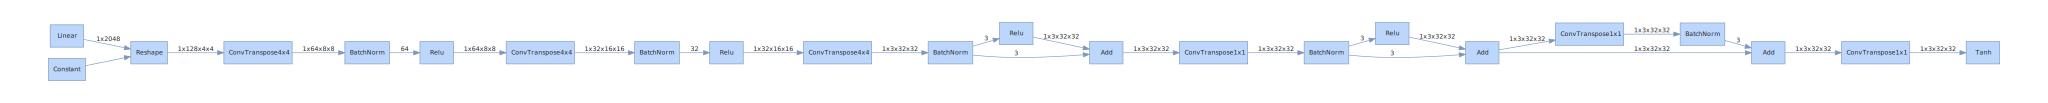

In [0]:
generator.save('assets/generator', 'png')
generator

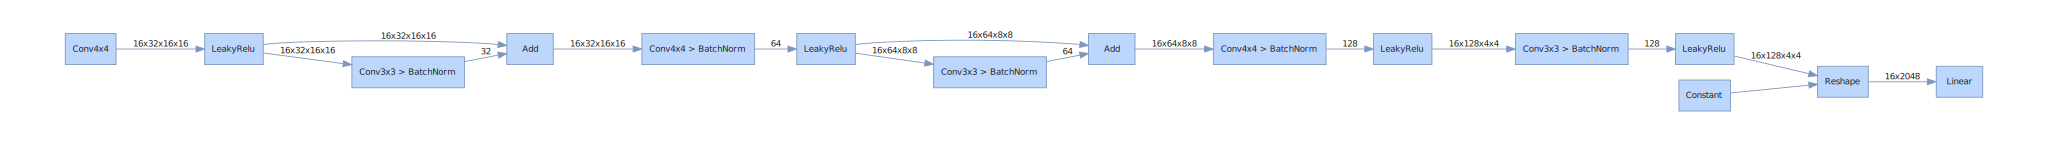

In [0]:
discriminator.save('assets/discriminator', 'png')
discriminator

In [0]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [0]:
def animate(path_to_images):
  imgs = []
  fig = plt.figure(figsize=(1,1),dpi=120)
  for img in glob.glob(path_to_images):
    imgs.append([plt.imshow(plt.imread(img), animated=True)])
  shuffle(imgs)
  ani = animation.ArtistAnimation(fig, imgs, interval=200, blit=True, repeat_delay=1000)
  ani.save('images.mp4')
  plt.show()
  

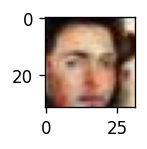

In [95]:
animate('/content/GAN/dlnd_face_generation_project/generated_samples/*')

In [96]:
from IPython.display import HTML
from base64 import b64encode
import numpy as np
mp4 = open('images.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)